<a href="https://colab.research.google.com/github/nrosh/test/blob/master/stockPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
# Description: Long Short Memory (LSTM) to predict the closing stock price of a corporation (Apple Inc.) using the past 60 days of the stock price.



In [29]:
# Import the libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [30]:
# Get the stock quote
df = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2020-01-11')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732143,14.607143,14.621429,14.686786,302220800.0,12.669562
2012-01-04,14.810000,14.617143,14.642857,14.765714,260022000.0,12.737653
2012-01-05,14.948214,14.738214,14.819643,14.929643,271269600.0,12.879066
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,13.013701
2012-01-09,15.276786,15.048214,15.196429,15.061786,394024400.0,12.993060
...,...,...,...,...,...,...
2020-01-06,74.989998,73.187500,73.447502,74.949997,118387200.0,74.308266
2020-01-07,75.224998,74.370003,74.959999,74.597504,108872000.0,73.958794
2020-01-08,76.110001,74.290001,74.290001,75.797501,132079200.0,75.148521


In [31]:
# Get the number of rows and columns in the data set
df.shape

(2019, 6)

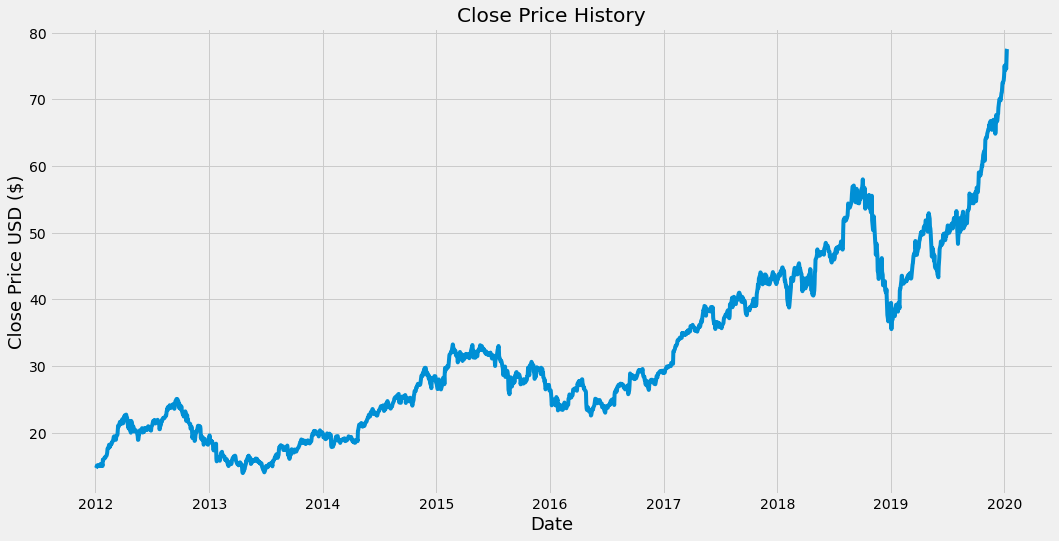

In [32]:
# visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [33]:
# Create a new dataframe with only the Close column
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model
training_data_len = math.ceil(len(dataset) * 0.8)
training_data_len

1616

In [34]:
# Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.01161759],
       [0.01285792],
       [0.015434  ],
       ...,
       [0.97194946],
       [0.99725001],
       [1.        ]])

In [35]:
# create the training dataset
# Create the scaled training data set
train_data = scaled_data[0:training_data_len, :]
# split the data into x_train and y_train
x_train = []
y_train = []
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i <= 60:
       print(x_train)
       print(y_train)
       print()

[array([0.01161759, 0.01285792, 0.015434  , 0.01788661, 0.01751058,
       0.01835804, 0.01797079, 0.01731975, 0.01643299, 0.01917745,
       0.02165251, 0.02088922, 0.016708  , 0.0206984 , 0.01676974,
       0.0315022 , 0.0303629 , 0.03185018, 0.03506605, 0.03701354,
       0.03685078, 0.03625027, 0.0388095 , 0.0412172 , 0.04394482,
       0.04835053, 0.05760532, 0.05774562, 0.06289779, 0.06674785,
       0.0601309 , 0.06267889, 0.06262839, 0.06977294, 0.06875708,
       0.07063722, 0.07401586, 0.07589602, 0.08131195, 0.08525742,
       0.08639674, 0.08679523, 0.08004918, 0.07842157, 0.07866292,
       0.0850049 , 0.08678963, 0.09062288, 0.09965877, 0.11171414,
       0.10945796, 0.10946356, 0.11817958, 0.12090721, 0.1189653 ,
       0.11719181, 0.11534534, 0.12147964, 0.12568893, 0.12745121])]
[0.12309600451876945]



In [36]:
#Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [37]:
# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1556, 60, 1)

In [38]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [39]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [40]:
# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

1556/1556 [==============================] - 42s 25ms/step - loss: 0.0020


In [41]:
 # Create the testing data set
 # Create a new array containing scaled values from index 1543 to 2003  
 test_data = scaled_data[training_data_len - 60: , :]
 # Create the data sets x_test and y_test
 x_test = []
 y_test = dataset[training_data_len: , :]
 for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [42]:
# Convert the data to a numpy array
x_test = np.array(x_test)

In [43]:
# Reshape the data
x_test = np.reshape(x_test,(x_test.shape[0], x_test.shape[1], 1)) # number of samples, number of time steps, number of features (Closing Price)

In [44]:
# Get the model's predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions) # we want predictions to contain the same values as our y_test dataset

In [45]:
# Get the root mean squared Error (RMSE)
rmse = np.sqrt(np.mean( predictions - y_test)**2)
rmse

0.043395891970499575

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


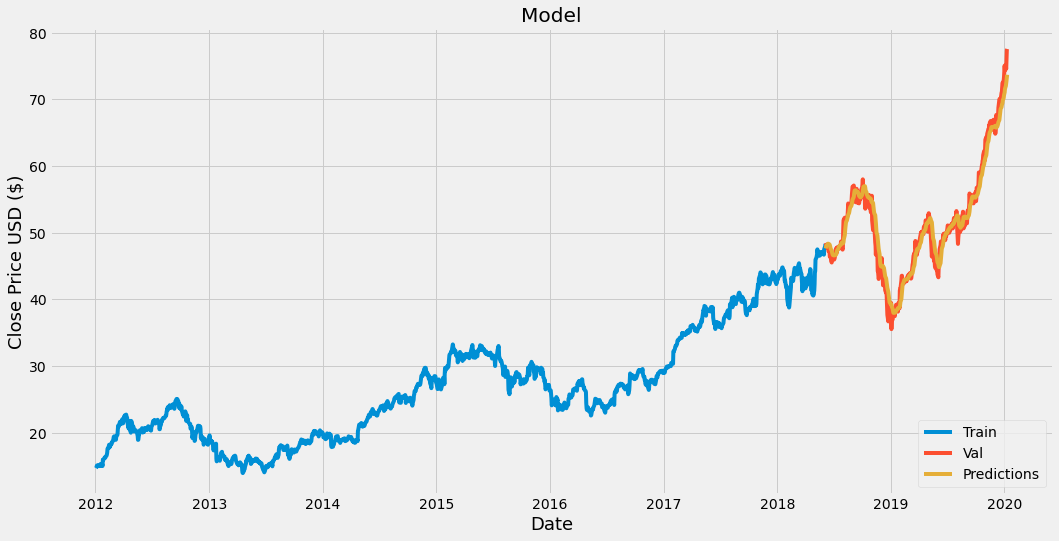

In [48]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train','Val','Predictions'], loc = 'lower right')
plt.show()

In [49]:
# Show the value and predicted prices 
valid

,Close,Predictions
Date,,
2018-06-06,48.494999,47.653610
2018-06-07,48.365002,47.872536
2018-06-08,47.924999,48.080276
2018-06-11,47.807499,48.220951
2018-06-12,48.070000,48.299774
...,...,...
2020-01-06,74.949997,72.056572
2020-01-07,74.597504,72.498146
2020-01-08,75.797501,72.844414


In [51]:
# Get the quote 
apple_quote = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2019-12-17')
# Create a new data frame
new_df = apple_quote.filter(['Close'])
# Get the last 60 day closing price value and convert the data frame to an array
last_60_days = new_df[-60:].values
# Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
# Create an empty list
X_test = []
# Append the past 60 days 
X_test.append(last_60_days_scaled)
# Convert the X_test data set to a numpy array
X_test = np.array(X_test)
# Reshape the data 
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))        
# Get the predicted scaled price
pred_price = model.predict(X_test)   
# Undo the scaling
pred_price = scaler.inverse_transform(pred_price)  
print(pred_price)

[[67.80457]]


In [52]:
# Get the quote 
apple_quote2 = web.DataReader('AAPL', data_source='yahoo', start='2019-12-18', end='2019-12-18')
print(apple_quote2['Close'])

Date
2019-12-18    69.934998
Name: Close, dtype: float64
